In [1]:
# Dependencies
import tweepy
from getWordsDF import getWordsDF as gw # importing the class
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# required argument for method
filepath = "triggerWords.csv"

In [2]:
words_df = gw.getWordsDF(filepath)
words_df.tail()

,phrases
42,I don't care
43,can't imagine living
44,What will heaven be like
45,"You know I love you, right"
46,want to disappear


In [3]:
i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(words_df)):

    k = analyzer.polarity_scores(words_df.iloc[i]['phrases'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

47

In [4]:
words_df['VADER score'] = compval1

In [5]:
words_df.head(20)

,phrases,VADER score
0,kill myself,-0.6908
1,hurt myself,-0.5267
2,suicide,-0.6705
3,can't take it,0.0000
4,not sleeping,0.0000
5,affairs in order,0.0000
6,hopeless,-0.4588
7,desperate,-0.3182
8,trapped,-0.5267
9,want to die,-0.5574


In [6]:
words_df.sort_values(by='VADER score', ascending=False)

,phrases,VADER score
44,What will heaven be like,0.7003
38,promise to take care of,0.6705
45,"You know I love you, right",0.6369
26,better of without me,0.4404
41,no one cares,0.2023
23,doesnt want to live,0.0772
34,I just want to sleep,0.0772
33,I just want to be done,0.0772
37,I want to go home,0.0772
27,let them down,0.0000


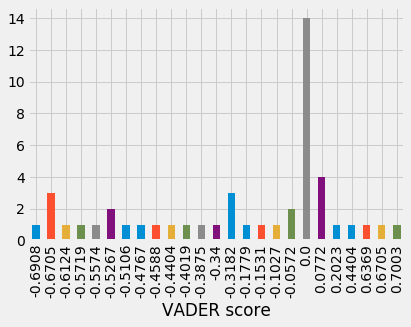

In [13]:
words_df.groupby('VADER score').size().plot(kind='bar')

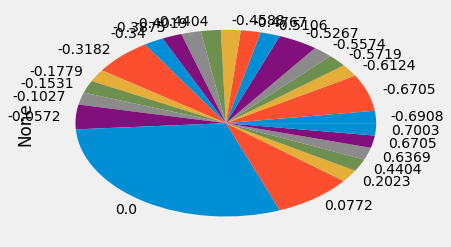

In [14]:
words_df.groupby('VADER score').size().plot(kind='pie')

In [12]:
words_df.to_csv('VADER_Target_List.csv', sep='\t', encoding='utf-8')